 Written by Federica B. Bianco @fedhere
UDel DSPS

Amended by Connor Mooney @comooney711, Nik Korzoun @nkorzounUD,
Andrew Crossman @AndrewCrossman, Ben Flaggs @bflaggs

GitHub usernames of each group member are listed after their respective names.

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means            

In [ ]:
from __future__ import print_function
__author__= 'Connor Mooney, Nik Korzoun, Andrew Crossman, Ben Flaggs'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")
from scipy.stats import semicircular

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it

In [ ]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [ ]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

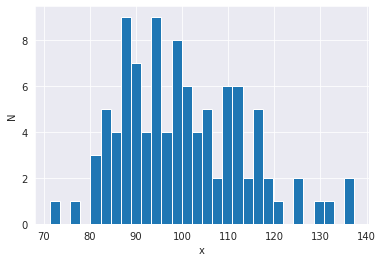

In [ ]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%( md['chisq'].mean(), md['chisq'].std() ) )

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes 

In [ ]:
mysize = (2000 / (np.array(range(1, 100, 1)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print( mysize  )

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20]
shape of the 'size' list that contains the size of each distribution (99,)


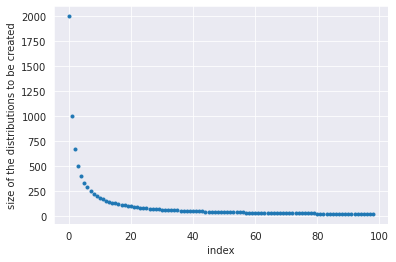

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

Text(1259.3999999999999, 100, 'expected mean')

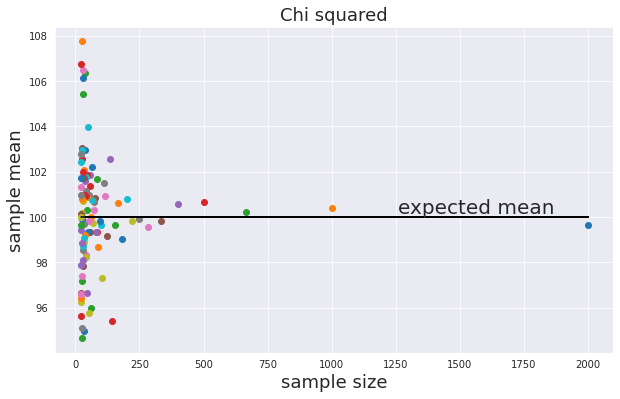

In [ ]:
# I am gonna create a new dictionary "md" the dictionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 
#and do it in a for loop. not pythonic, but easily readable
for n in range(len(mysize)):
    md['chisq'][n] = np.random.chisquare(df, size = mysize[n]) #all distributions have mean=df=100
  

# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(mysize[nn], md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)


### Figure 2: Mean value of Chi Squared distribution with 100 degrees of freedom, as a function of sample size. Mean becomes closer to expected value as sample size increases.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'N')

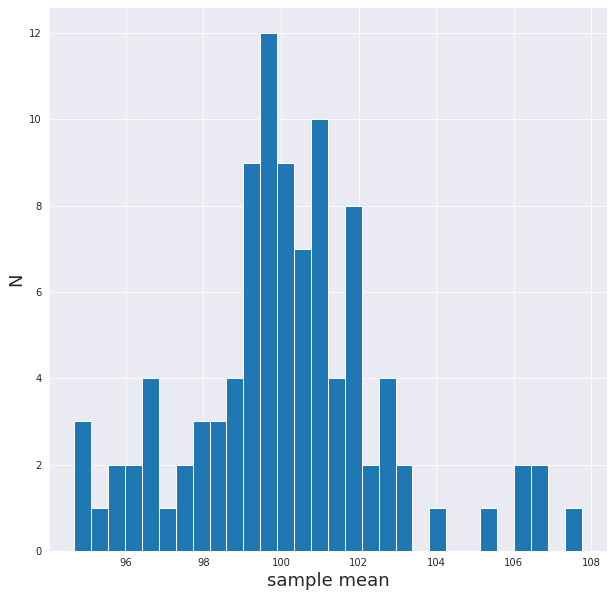

In [ ]:
allmeans = list(md['chisq']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: Histogram of the means of 100 chi square distributions with varying sizes

# Do it for the Normal distribution


Text(1259.3999999999999, 100, 'expected mean')

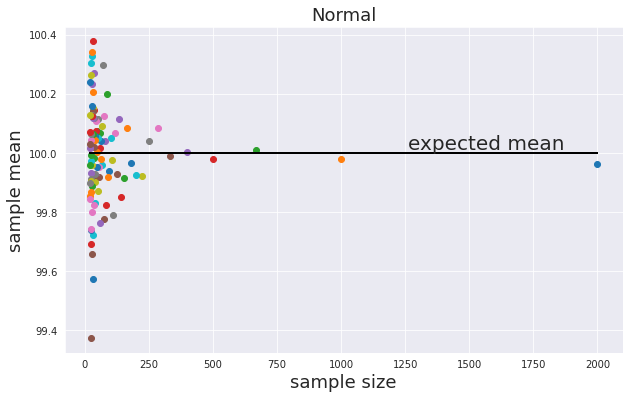

In [ ]:
md['norm']={}
for n in range(len(mysize)):
  md['norm'][n]=np.random.normal(mymean, size=mysize[n])

md['norm']['means']={}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        axnorm_mu_n.plot(mysize[nn], md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axnorm_mu_n.text(axnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)



### Figure 4: Mean value of Normal distributions with mean 100 as a function of sample size. Mean becomes closer to expected value as sample size increases.

# Do it for the Poisson distribution

Text(1259.3999999999999, 100, 'expected mean')

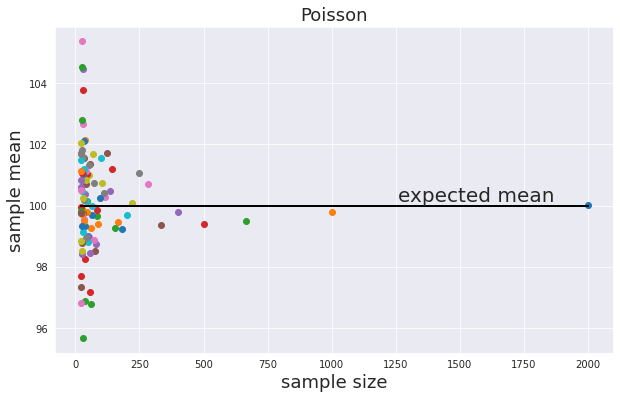

In [ ]:
md['pois']={}
for n in range(len(mysize)):
  md['pois'][n]=np.random.poisson(mymean, size=mysize[n])

md['pois']['means']={}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(mysize[nn], md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 5: Mean value of Poisson distributions with mean 100 as a function of sample size. Mean becomes closer to expected value as sample size increases.

# Do it for the Binomial distribution

Text(1259.3999999999999, 100, 'expected mean')

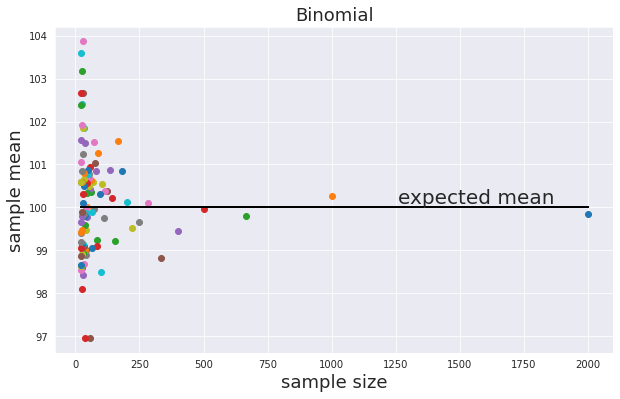

In [ ]:
md['bi']={}
for n in range(len(mysize)):
  md['bi'][n]=np.random.binomial(200,0.5, size=mysize[n])

md['bi']['means']={}
axbi_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['bi']:
    if not type(nn) == str:
        md['bi']['means'][nn] = md['bi'][nn].mean()
        axbi_mu_n.plot(mysize[nn], md['bi']['means'][nn], 'o')
        axbi_mu_n.set_xlabel('sample size', fontsize=18)
        axbi_mu_n.set_ylabel('sample mean', fontsize=18)
        axbi_mu_n.set_title('Binomial', fontsize=18)
        axbi_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axbi_mu_n.text(axbi_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 6: Mean value of Binomial distributions with mean 100 as a function of sample size. Mean becomes closer to expected value as sample size increases.

# Do it for another distribution

Text(1259.3999999999999, 100, 'expected mean')

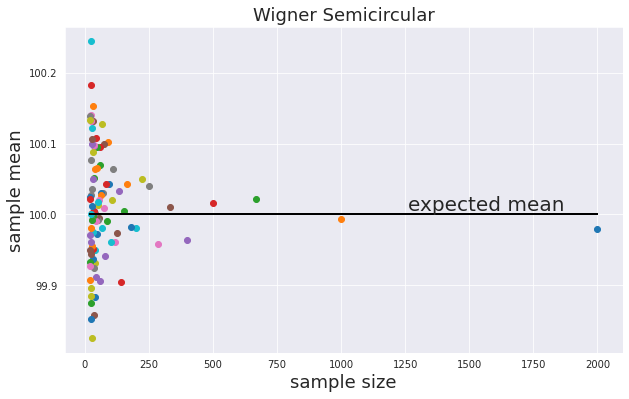

In [ ]:
md['semic']={}
for n in range(len(mysize)):
  md['semic'][n]= semicircular.rvs(loc=100,size=mysize[n])

md['semic']['means']={}
axsemic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['semic']:
    if not type(nn) == str:
        md['semic']['means'][nn] = md['semic'][nn].mean()
        axsemic_mu_n.plot(mysize[nn], md['semic']['means'][nn], 'o')
        axsemic_mu_n.set_xlabel('sample size', fontsize=18)
        axsemic_mu_n.set_ylabel('sample mean', fontsize=18)
        axsemic_mu_n.set_title('Wigner Semicircular', fontsize=18)
        axsemic_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axsemic_mu_n.text(axsemic_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 7: Mean value of Wigner Semicircular distributions with mean 100 as a function of sample size. Mean becomes closer to expected value as sample size increases. 

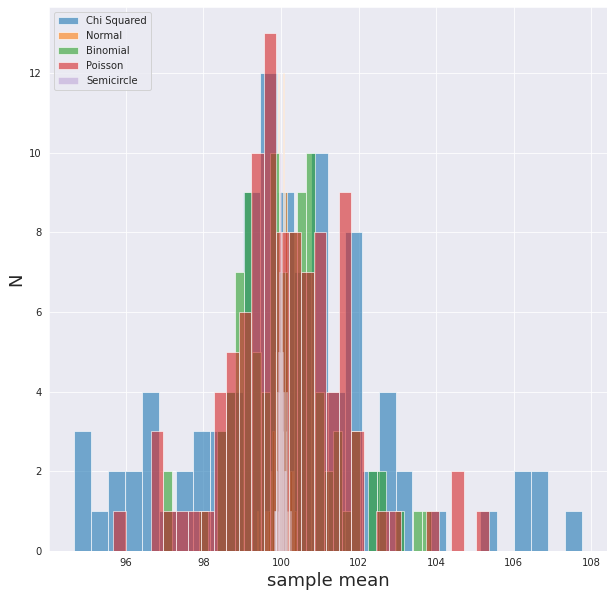

In [ ]:
Chimeans = list(md['chisq']['means'].values())
Normmeans = list(md['norm']['means'].values())
Bimeans = list(md['bi']['means'].values())
Poismeans = list(md['pois']['means'].values())
Semicmeans = list(md['semic']['means'].values())

pl.figure(figsize=(10, 10))

pl.hist(Chimeans,bins=30, label='Chi Squared',alpha=0.6 )
pl.hist(Normmeans,bins=30, label='Normal',alpha=0.6)
pl.hist(Bimeans,bins=30, label='Binomial',alpha=0.6)
pl.hist(Poismeans,bins=30, label='Poisson',alpha=0.6)
pl.hist(Semicmeans,bins=30, label='Semicircle',alpha=0.3)

pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc = 'upper left')
pl.show()

#pl.hist(Semicmeans)
#pl.show()



## Figure 8: Histograms of the means of a particular distribution sampled 100 times at varying sizes. Each distribution peaks near the expected value.

# 661 students: fit  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

In [ ]:
#pl.hist(allmeans,bins=30)

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [ ]:
def gaussian(x, a, b, c):
  '''Defines a non-normalized Gaussian function.

  Parameters:
  x -- independent variable
  a -- height of Gaussian
  b -- center of Gaussian
  c -- standard deviation of Gaussian (c**2 = variance)
  '''
  return a * np.exp(-0.5 * (x - b)**2 / c**2)


Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

# Fit Gaussian to Chisq distribution

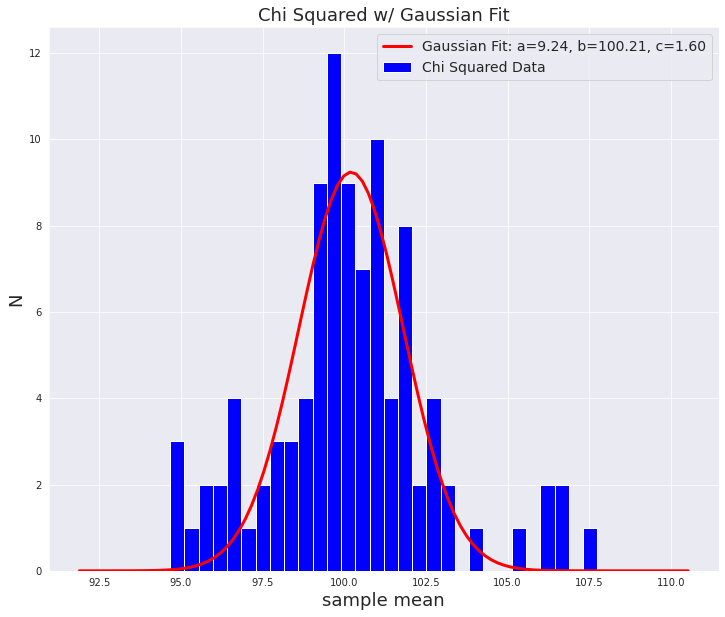

In [ ]:
pl.figure(figsize=(12, 10))
yvals, binedges, patches = pl.hist(Chimeans,bins=30, color='blue',
                                   label='Chi Squared Data')

xvals = np.zeros(len(binedges)-1)

for i in range(len(binedges)-1):
  midpoint = (binedges[i+1] - binedges[i]) / 2
  xvals[i] = binedges[i] + midpoint

popt, pcov = curve_fit(gaussian, xvals, yvals,
                       bounds=([0.,97.,0.01], [20.,103.,20.]))

xplotting = np.linspace(xvals[0] - 3, xvals[-1] + 3, 100)

pl.plot(xplotting, gaussian(xplotting, *popt), color='red', linestyle='solid',
        label=rf'Gaussian Fit: a={popt[0]:.2f}, b={popt[1]:.2f}, ' \
        f'c={popt[2]:.2f}', linewidth=3)

pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Chi Squared w/ Gaussian Fit', fontsize=18)
pl.legend(loc='best', fontsize=14);


## Figure 9: Fitting a Gaussian curve to a histogram sampled from a Chi squared distribution

# Fit Gaussian to Normal distribution

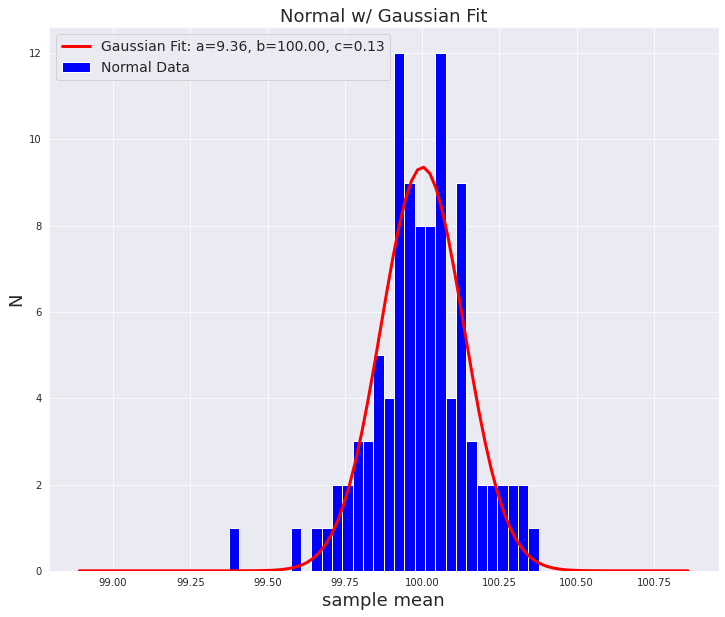

In [ ]:
pl.figure(figsize=(12, 10))
yvals, binedges, patches = pl.hist(Normmeans,bins=30, color='blue',
                                   label='Normal Data')

xvals = np.zeros(len(binedges)-1)

for i in range(len(binedges)-1):
  midpoint = (binedges[i+1] - binedges[i]) / 2
  xvals[i] = binedges[i] + midpoint

popt, pcov = curve_fit(gaussian, xvals, yvals,
                       bounds=([0., 99.5, 0.01], [20., 100.5, 10.]))

xplotting = np.linspace(xvals[0] - 0.5, xvals[-1] + 0.5, 100)

pl.plot(xplotting, gaussian(xplotting, *popt), color='red', linestyle='solid',
        label=rf'Gaussian Fit: a={popt[0]:.2f}, b={popt[1]:.2f}, ' \
        f'c={popt[2]:.2f}', linewidth=3)

pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Normal w/ Gaussian Fit', fontsize=18)
pl.legend(loc='upper left', fontsize=14);


## Figure 10: Fitting a Gaussian curve to a histogram sampled from a normal distribution

# Fit Gaussian to Binomial distribution

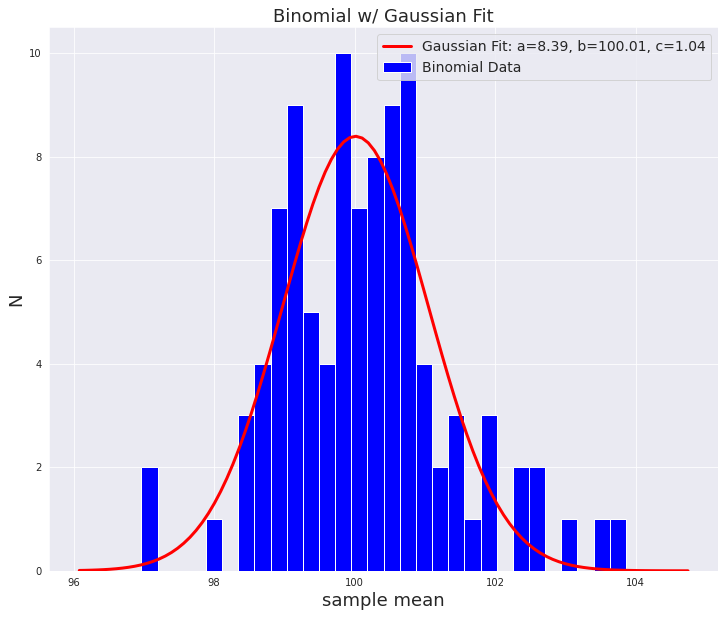

In [ ]:
pl.figure(figsize=(12, 10))
yvals, binedges, patches = pl.hist(Bimeans,bins=30, color='blue',
                                   label='Binomial Data')

xvals = np.zeros(len(binedges)-1)

for i in range(len(binedges)-1):
  midpoint = (binedges[i+1] - binedges[i]) / 2
  xvals[i] = binedges[i] + midpoint

popt, pcov = curve_fit(gaussian, xvals, yvals,
                       bounds=([0., 99., 0.01], [20., 101., 10.]))

xplotting = np.linspace(xvals[0] - 1, xvals[-1] + 1, 100)

pl.plot(xplotting, gaussian(xplotting, *popt), color='red', linestyle='solid',
        label=rf'Gaussian Fit: a={popt[0]:.2f}, b={popt[1]:.2f}, ' \
        f'c={popt[2]:.2f}', linewidth=3)

pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Binomial w/ Gaussian Fit', fontsize=18)
pl.legend(loc='best', fontsize=14);


## Figure 11: Fitting a Gaussian curve to a histogram sampled from a binomial distribution

# Fit Gaussian to Poisson distribution

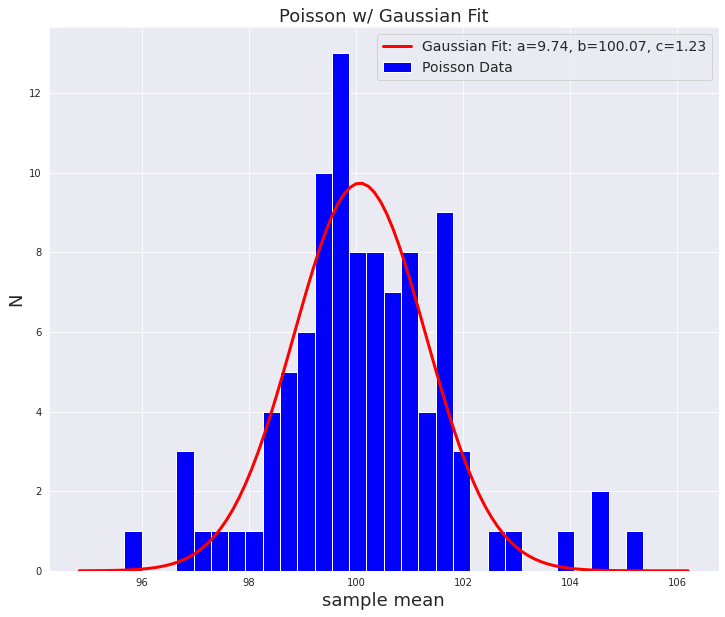

In [ ]:
pl.figure(figsize=(12, 10))
yvals, binedges, patches = pl.hist(Poismeans,bins=30, color='blue',
                                   label='Poisson Data')

xvals = np.zeros(len(binedges)-1)

for i in range(len(binedges)-1):
  midpoint = (binedges[i+1] - binedges[i]) / 2
  xvals[i] = binedges[i] + midpoint

popt, pcov = curve_fit(gaussian, xvals, yvals,
                       bounds=([0., 98., 0.01], [20., 102., 10.]))

xplotting = np.linspace(xvals[0] - 1, xvals[-1] + 1, 100)

pl.plot(xplotting, gaussian(xplotting, *popt), color='red', linestyle='solid',
        label=rf'Gaussian Fit: a={popt[0]:.2f}, b={popt[1]:.2f}, ' \
        f'c={popt[2]:.2f}', linewidth=3)

pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Poisson w/ Gaussian Fit', fontsize=18)
pl.legend(loc='best', fontsize=14);


## Figure 12: Fitting a Gaussian curve to a histogram sampled from a Poisson distribution

# Fit Gaussian to Semicircle distribution

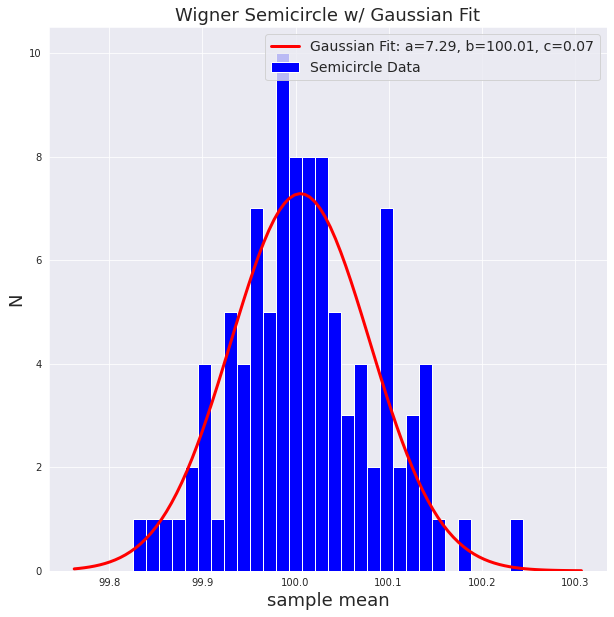

In [ ]:
pl.figure(figsize=(10, 10))
yvals, binedges, patches = pl.hist(Semicmeans,bins=30, color='blue',
                                   label='Semicircle Data')

xvals = np.zeros(len(binedges)-1)

for i in range(len(binedges)-1):
  midpoint = (binedges[i+1] - binedges[i]) / 2
  xvals[i] = binedges[i] + midpoint

popt, pcov = curve_fit(gaussian, xvals, yvals,
                       bounds=([0., 90., 0.01], [100., 110., 20.]))

xplotting = np.linspace(xvals[0] - .07, xvals[-1] + .07, 100)

pl.plot(xplotting, gaussian(xplotting, *popt), color='red', linestyle='solid',
        label=rf'Gaussian Fit: a={popt[0]:.2f}, b={popt[1]:.2f}, ' \
        f'c={popt[2]:.2f}', linewidth=3)

pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Wigner Semicircle w/ Gaussian Fit', fontsize=18)
pl.legend(loc='best', fontsize=14);


## Figure 13: Fitting a Gaussian curve to a histogram sampled from a Wigner semicircular distribution